   Step  Time (fs)  Kin. Energy (a.u.)    Temp (K)  Pot. Energy (a.u.)  \
0     0        0.0            0.275038  300.000000        -1102.906649   
1     1        0.5            0.298856  325.979596        -1102.933030   
2     2        1.0            0.329254  359.136268        -1102.981487   
3     3        1.5            0.363338  396.314082        -1103.026756   
4     4        2.0            0.370804  404.457945        -1103.057004   

   Cons Qty (a.u.)  Used Time (s)  
0     -1102.631611       0.000000  
1     -1102.633956     155.936749  
2     -1102.635468      31.047928  
3     -1102.635550      28.680220  
4     -1102.635667      30.281395  


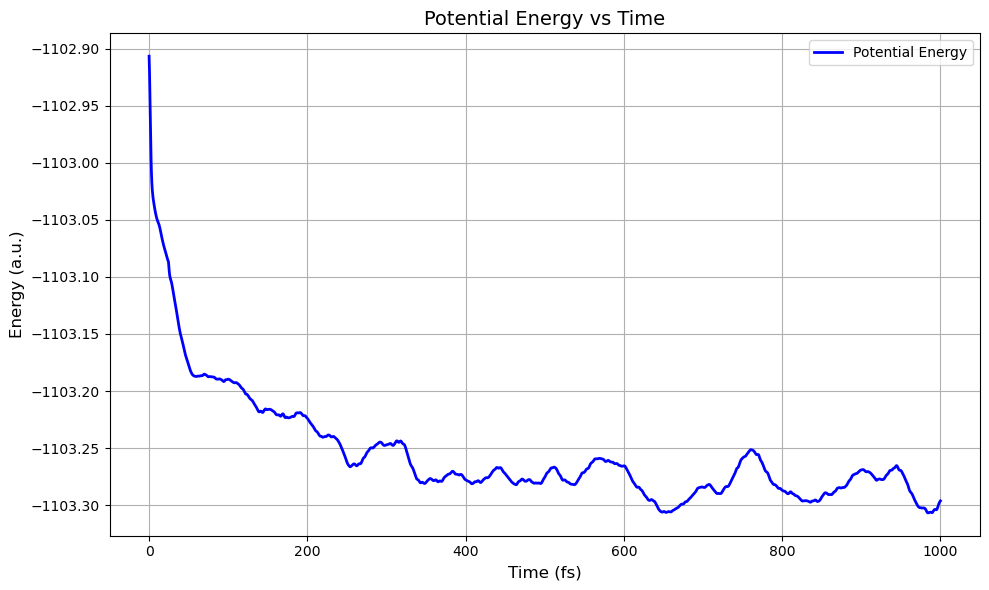

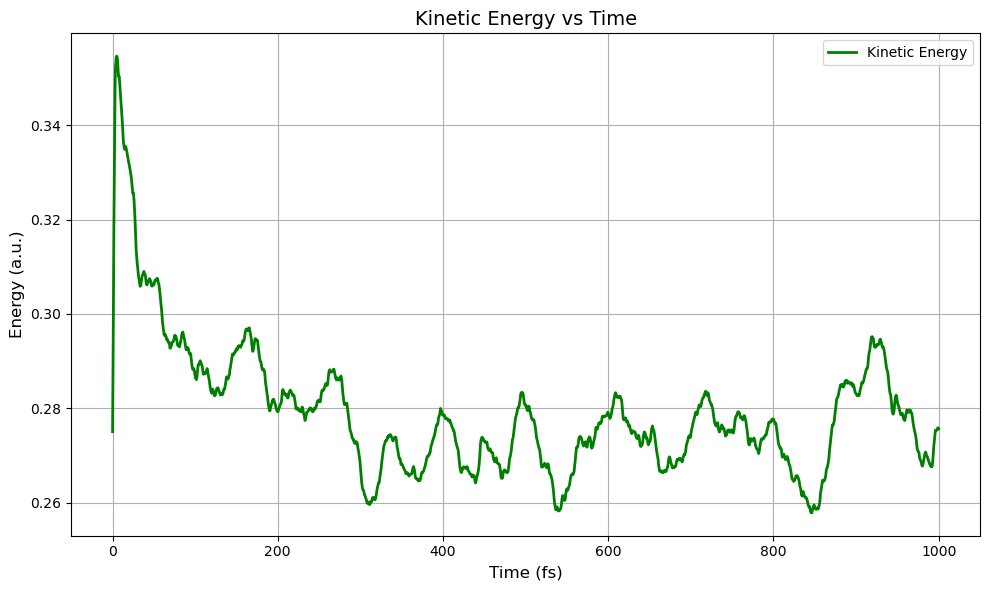

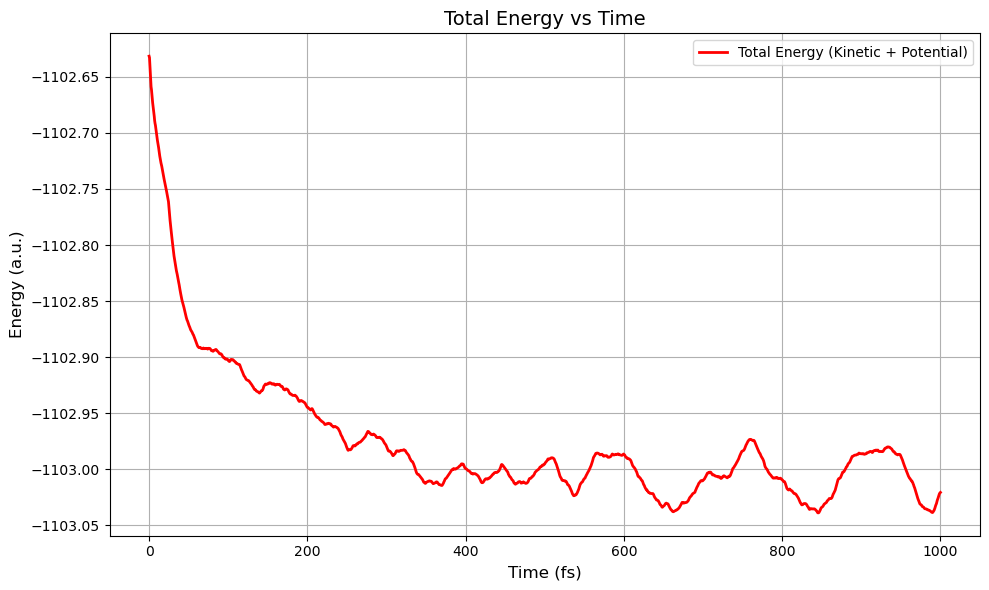

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the .ener file and load the data
file_path = "/home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton_aimd_1ns_every0.5f-1.ener"  # Update the path if needed

# Define column names (as per the data structure in the .ener file)
columns = ["Step", "Time (fs)", "Kin. Energy (a.u.)", "Temp (K)", "Pot. Energy (a.u.)", "Cons Qty (a.u.)", "Used Time (s)"]

# Load the data, skipping the header rows (adjust skiprows if the format changes)
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=1, names=columns)

# Check the first few rows to ensure data is loaded correctly
print(data.head())

# Compute Total Energy (Kinetic + Potential)
data["Total Energy (a.u.)"] = data["Kin. Energy (a.u.)"] + data["Pot. Energy (a.u.)"]

# Smoothing function using a simple moving average
def smooth(data, window_size=10):
    return data.rolling(window=window_size, min_periods=1).mean()

# Apply smoothing to the energy data
data["Smooth Pot. Energy (a.u.)"] = smooth(data["Pot. Energy (a.u.)"], window_size=50)
data["Smooth Kin. Energy (a.u.)"] = smooth(data["Kin. Energy (a.u.)"], window_size=50)
data["Smooth Total Energy (a.u.)"] = smooth(data["Total Energy (a.u.)"], window_size=50)

# Plot Potential Energy vs Time (smoothed)
plt.figure(figsize=(10, 6))
plt.plot(data["Time (fs)"], data["Smooth Pot. Energy (a.u.)"], label="Potential Energy", color="blue", linestyle='-', linewidth=2)
plt.xlabel("Time (fs)", fontsize=12)
plt.ylabel("Energy (a.u.)", fontsize=12)
plt.title("Potential Energy vs Time", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Smooth_Potential_Energy_vs_Time.png", dpi=300)  # Save the plot
plt.show()

# Plot Kinetic Energy vs Time (smoothed)
plt.figure(figsize=(10, 6))
plt.plot(data["Time (fs)"], data["Smooth Kin. Energy (a.u.)"], label="Kinetic Energy", color="green", linestyle='-', linewidth=2)
plt.xlabel("Time (fs)", fontsize=12)
plt.ylabel("Energy (a.u.)", fontsize=12)
plt.title("Kinetic Energy vs Time", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Smooth_Kinetic_Energy_vs_Time.png", dpi=300)  # Save the plot
plt.show()

# Plot Total Energy vs Time (smoothed)
plt.figure(figsize=(10, 6))
plt.plot(data["Time (fs)"], data["Smooth Total Energy (a.u.)"], label="Total Energy (Kinetic + Potential)", color="red", linestyle='-', linewidth=2)
plt.xlabel("Time (fs)", fontsize=12)
plt.ylabel("Energy (a.u.)", fontsize=12)
plt.title("Total Energy vs Time", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Smooth_Total_Energy_vs_Time.png", dpi=300)  # Save the plot
plt.show()




In [7]:
def xyz_to_pdb(xyz_file, pdb_file, box_size=None):
    """
    Converts an XYZ file to a PDB file.
    
    Parameters:
    - xyz_file: str - Path to the input XYZ file.
    - pdb_file: str - Path to the output PDB file.
    - box_size: tuple - Box dimensions (a, b, c) in Ångströms. Default is None.
    """
    with open(xyz_file, 'r') as xyz, open(pdb_file, 'w') as pdb:
        lines = xyz.readlines()
        
        # First line: Number of atoms
        num_atoms = int(lines[0].strip())
        
        # Second line: Box size information (optional)
        if box_size:
            pdb.write(f"CRYST1{box_size[0]:9.3f}{box_size[1]:9.3f}{box_size[2]:9.3f}  90.00  90.00  90.00 P 1           1\n")
        
        # Atom data conversion
        pdb.write(f"TITLE     Converted from {xyz_file}\n")
        pdb.write("MODEL        1\n")
        
        for i, line in enumerate(lines[2:2+num_atoms], start=1):
            parts = line.split()
            element, x, y, z = parts[0], float(parts[1]), float(parts[2]), float(parts[3])
            pdb.write(f"HETATM{i:5d}  {element:<2}  MOL     1    {x:8.3f}{y:8.3f}{z:8.3f}  1.00  0.00           {element:<2}\n")
        
        pdb.write("ENDMDL\n")
        pdb.write("END\n")
    print(f"Converted {xyz_file} to {pdb_file}")

# Example usage
xyz_to_pdb(
    xyz_file="/home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton_aimd_1ns_every0.5f-pos-1.xyz",
    pdb_file="/home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton.pdb",
    box_size=(12.42, 12.42, 12.42)  # Box dimensions (Å)
)


Converted /home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton_aimd_1ns_every0.5f-pos-1.xyz to /home/ndv3235/comp-lab-class-2024/Week12-IntroAIMD/Run_Proton/proton.pdb
